# Learning classifiers

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://pyagrum.gitlab.io) |[ ![interactive online version](images/atbinder.svg)](https://mybinder.org/v2/gl/agrumery%2FaGrUM/forBinder?urlpath=%2Fdoc%2Ftree%2Fwrappers%2Fpyagrum%2Fdoc%2Fsphinx%2Fnotebooks%2F51-Classifier_Learning.ipynb)

In [1]:
import pyagrum.skbn as skbn
import pyagrum.lib.notebook as gnb

skbn is a pyAgrum's module that allows to use bayesian networks as classifier in the scikit-learn environment.
## Initialization of parameters

First, we initialize the parameters to indicate properties we want our classifier to have.

In [2]:
BNTest = skbn.BNClassifier(
  learningMethod="Chow-Liu",
  prior="Smoothing",
  priorWeight=0.5,
  discretizationStrategy="quantile",
  usePR=True,
  significant_digit=13,
)

Then, we train the classifier thanks to two types of objects.

## Learn from csv file

In [3]:
BNTest.fit(data="res/creditCardTest.csv", targetName="Class")

In [4]:
for i in BNTest.bn.nodes():
  print(BNTest.bn.variable(i))

Class:Labelized({0.0|1.0})
Time:Discretized(<(0;1578[,[1578;3733[,[3733;6982[,[6982;11033[,[11033;170348)>)
V1:Discretized(<(-30.55238004;-1.332949264[,[-1.332949264;-0.654664391[,[-0.654664391;0.30537512[,[0.30537512;1.183457866[,[1.183457866;2.132386021)>)
V2:Discretized(<(-25.64052693;-0.362407881[,[-0.362407881;0.104021894[,[0.104021894;0.582468095[,[0.582468095;1.126264537[,[1.126264537;22.05772899)>)
V3:Discretized(<(-31.10368482;0.107723002[,[0.107723002;0.675277319[,[0.675277319;1.145250512[,[1.145250512;1.731063013[,[1.731063013;4.101716178)>)
V4:Discretized(<(-4.657545034;-0.8356831[,[-0.8356831;0.033423475[,[0.033423475;0.648385592[,[0.648385592;1.445625927[,[1.445625927;12.11467184)>)
V5:Discretized(<(-22.10553152;-0.8136663[,[-0.8136663;-0.355922897[,[-0.355922897;0.03294682[,[0.03294682;0.534604692[,[0.534604692;11.97426887)>)
V6:Discretized(<(-7.574798166;-0.789777644[,[-0.789777644;-0.370597233[,[-0.370597233;0.035355351[,[0.035355351;0.711815449[,[0.711815449;10.033922

In [5]:
gnb.sideBySide(BNTest.bn, gnb.getInference(BNTest.bn, size="15!"))

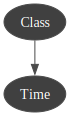

In [6]:
gnb.showBN(BNTest.MarkovBlanket)

## Learn from array-likes

We use a method to transform the csv file in two array-likes in order to train from the same database.

In [7]:
# we use now another method to learn the BN (MIIC)
BNTest = skbn.BNClassifier(
  learningMethod="MIIC",
  prior="Smoothing",
  priorWeight=0.5,
  discretizationStrategy="quantile",
  usePR=True,
  significant_digit=13,
)

xTrain, yTrain = BNTest.XYfromCSV(filename="res/creditCardTest.csv", target="Class")

In [8]:
BNTest.fit(xTrain, yTrain)

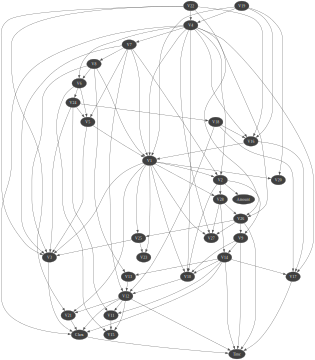

In [9]:
gnb.showBN(BNTest.bn)

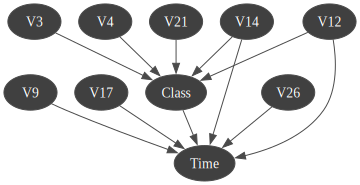

In [10]:
gnb.showBN(BNTest.MarkovBlanket)

## Create a classifier from a Bayesian network

If we already have a Bayesian network with learned parameters, we can create a classifier that uses it. In this case we do not have to train the classifier on data since it the Bayesian network is already trained.

In [11]:
ClassfromBN = skbn.BNClassifier(significant_digit=7)

In [12]:
ClassfromBN.fromTrainedModel(
  bn=BNTest.bn,
  targetAttribute="Class",
  targetModality="1.0",
  threshold=BNTest.threshold,
  variableList=xTrain.columns.tolist(),
)

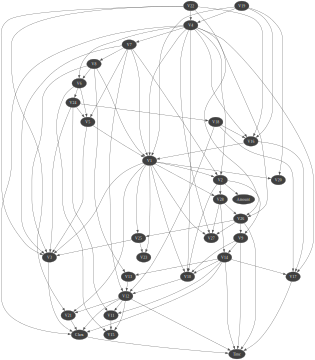

In [13]:
gnb.showBN(ClassfromBN.bn)

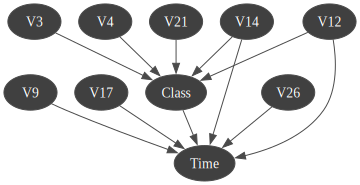

In [14]:
gnb.showBN(ClassfromBN.MarkovBlanket)

Then, we work with functions from scikit-learn like score.
We can also call it with a csv file or two array-likes.

In [15]:
xTest, yTest = ClassfromBN.XYfromCSV(filename="res/creditCardTest.csv", target="Class")

## Prediction for classifier

### Prediction with csv file

In [16]:
scoreCSV1 = BNTest.score("res/creditCardTest.csv", y=yTest)
print("{0:.2f}% good predictions".format(100 * scoreCSV1))

99.77% good predictions


In [17]:
scoreCSV2 = ClassfromBN.score("res/creditCardTest.csv", y=yTest)
print("{0:.2f}% good predictions".format(100 * scoreCSV2))

99.77% good predictions


### Prediction with array-like

In [18]:
scoreAR1 = BNTest.score(xTest, yTest)
print("{0:.2f}% good predictions".format(100 * scoreAR1))

99.77% good predictions


In [19]:
scoreAR2 = ClassfromBN.score(xTest, yTest)
print("{0:.2f}% good predictions".format(100 * scoreAR2))

99.77% good predictions


## ROC and Precision-Recall curves with all methods

In addition (and of  course), we can work with functions from pyagrum (from  `pyagrum.lib.bn2roc`).

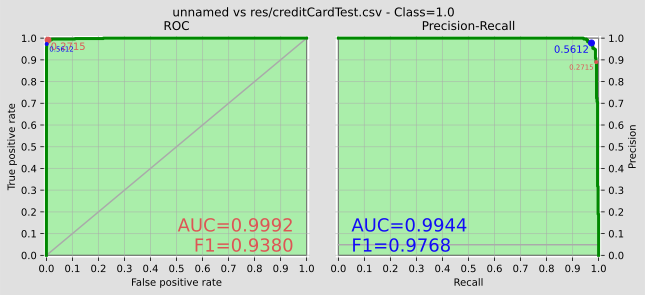

In [20]:
BNTest.showROC_PR("res/creditCardTest.csv")